# 01.01 - PROYECTO KAGGLE

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()#establece conexion con el repositorio del curso

replicating local resources


## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [ ]:
!pip install -q kaggle  #instalar el paquete de kaggle en el entorno
from google.colab import files  #imortar libreria para subir archivo .json
files.upload()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'  #permitir lectura de credenciales
!chmod 600 ./kaggle.json
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 41.6MB/s]


## unzip and inspect data

In [ ]:
!unzip house-prices-advanced-regression-techniques.zip > /dev/null  #descomprimir archivo

In [ ]:
!wc sample_submission.csv

 1460  1460 31939 sample_submission.csv


## load `train.csv` data with pandas



In [ ]:
import pandas as pd  #importar librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

z = pd.read_csv("train.csv")    #leer el archivo .csv
print ("shape of loaded dataframe", z.shape)    #leer filas y columnas


shape of loaded dataframe (1460, 81)


In [ ]:
z.head()     #mostrar dataframe

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
df_test=pd.read_csv('/content/test.csv')   #testear datos
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

## we will do a model using only two columns

- we have to predict column `SaleCondition` using the rest

- we will use columns
  - `LotFrontage` which we will need to convert to a **onehot encoding**
  - `LotArea` which we will need to convert to a **continuous encoding**

In [ ]:
z = z[['LotFrontage', 'LotArea', 'SaleCondition']]
z.head()

LotFrontage  LotArea SaleCondition
0         65.0     8450        Normal
1         80.0     9600        Normal
2         68.0    11250        Normal
3         60.0     9550       Abnorml
4         84.0    14260        Normal

<Axes: xlabel='LotFrontage'>

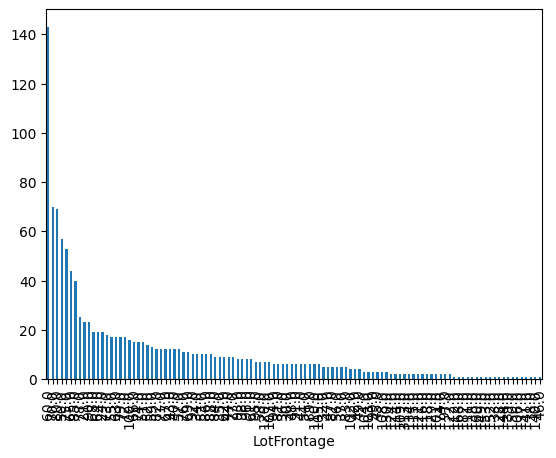

In [ ]:
z.LotFrontage.value_counts().plot(kind='bar')

<Axes: xlabel='LotArea'>

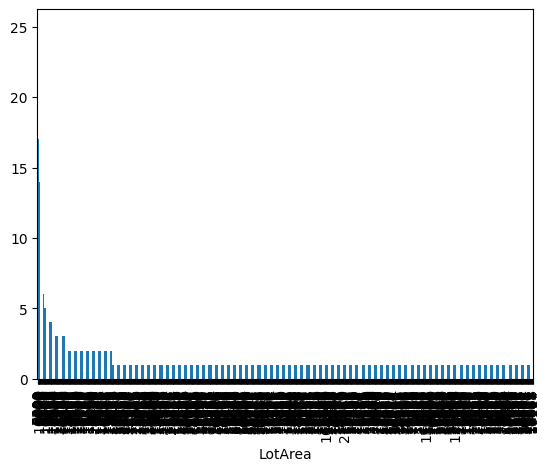

In [ ]:
z.LotArea.value_counts().plot(kind='bar')

## Inspect visually if these two columns have distinctive behaviour with respect to what we want to predict

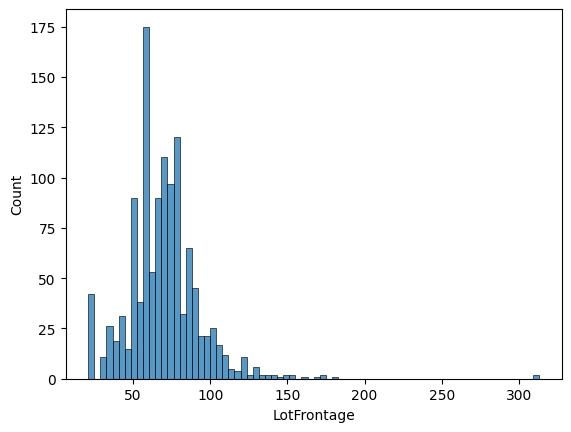

In [ ]:
sns.histplot(z['LotFrontage']); # variacion de medida frontal lineal

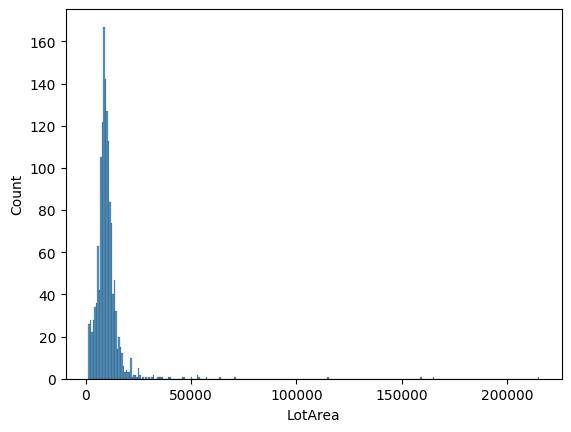

In [ ]:
sns.histplot(z['LotArea']); # variacion de tamaño de lotes

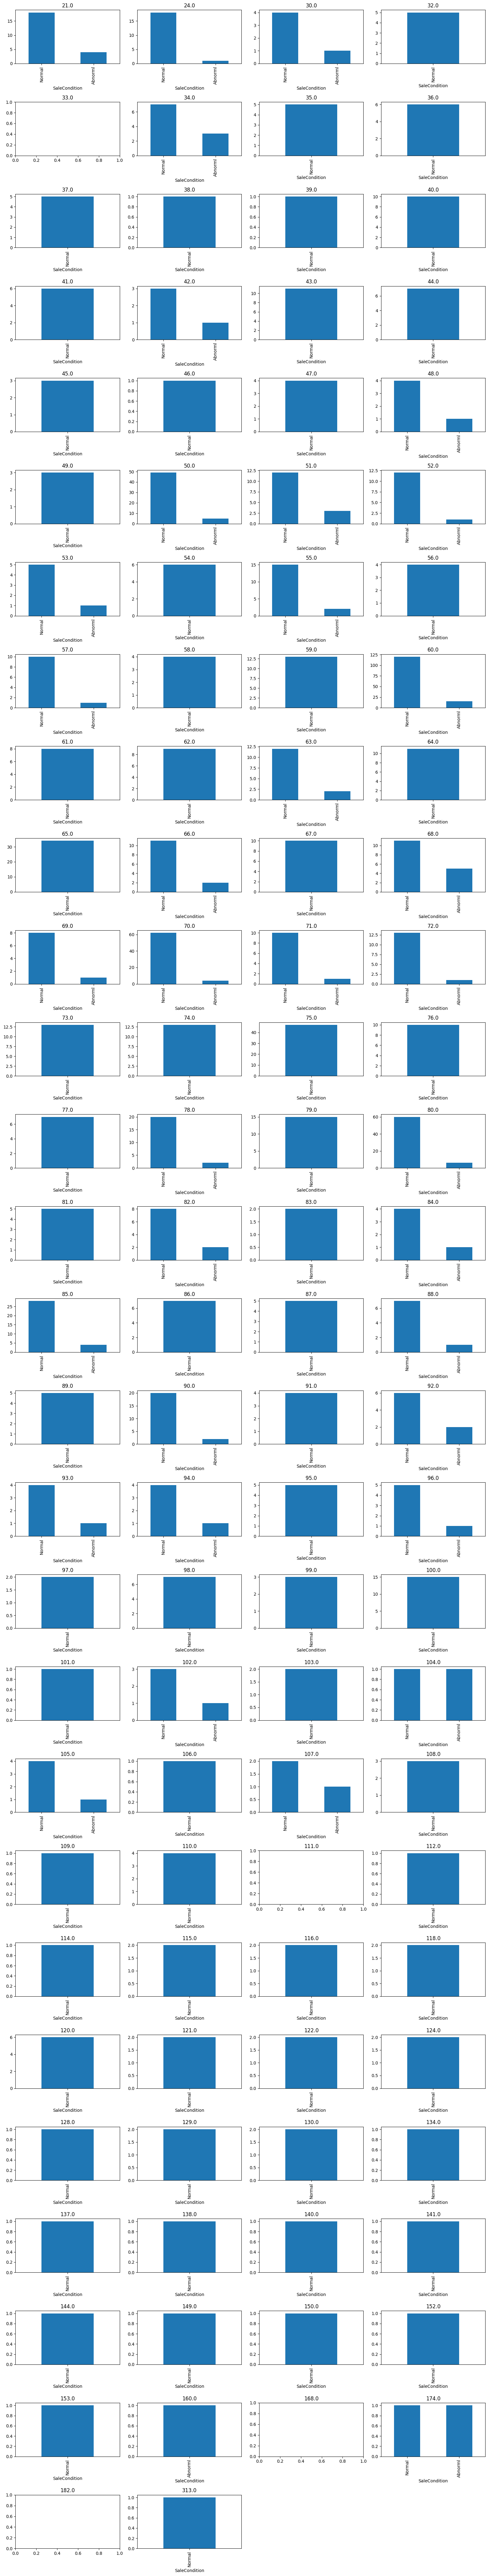

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt
#analizar comportamiento de las variables respecto a la prediccion
# c = sorted(z.LotFrontage.value_counts().index)
# for ax,ci in subplots(c, n_cols=4, usizex=4):
 #   zc = z[z.LotFrontage==ci]
 #   zc.SaleCondition.value_counts()[['Normal','Abnorml']].plot(kind='bar')
 #   plt.title(ci)
c = sorted(z.LotFrontage.value_counts().index)
for ax, ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.LotFrontage == ci]
    value_counts = zc.SaleCondition.value_counts()
    # Verificar si 'Normal' y 'Abnorml' están en los índices antes de acceder
    if 'Normal' in value_counts.index and 'Abnorml' in value_counts.index:
        value_counts[['Normal', 'Abnorml']].plot(kind='bar', ax=ax)
    elif 'Normal' in value_counts.index:
        value_counts[['Normal']].plot(kind='bar', ax=ax)
    elif 'Abnorml' in value_counts.index:
        value_counts[['Abnorml']].plot(kind='bar', ax=ax)
    plt.title(ci)
plt.show()